# Purpose:
### - Explore the hailstone integer sequence https://oeis.org/A348074
### - Identify cycles and graph the sequence seed trajectories (running the algorithm on each seed until the trajectory falls into one of the cycles).

In [1]:
# libraries and functions
import networkx as nx
from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt

def unique(ll):
    temp = []
    [temp.append(i) for i in ll if i not in temp]
    return temp
    
def bitflip(n): 
    if n==0: return 1
    else: return (1<<int.bit_length(n)) - n - 1

### There are two cycles in this hailstone sequence, one large and one small

In [2]:
shortcycle = []
j = 3
w = ''
n = j
while w != j:
    if n%2 == 0:
        n = bitflip(n)
    else: 
        n = 3 * n + 1
    w = n
    shortcycle.append(n)
print(shortcycle)

[10, 5, 16, 15, 46, 17, 52, 11, 34, 29, 88, 39, 118, 9, 28, 3]


In [3]:
longcycle = []
j = 27
w = ''
n = j
while w != j:
    if n%2 == 0:
        n = bitflip(n)
    else: 
        n = 3 * n + 1
    w = n
    longcycle.append(n)
print(longcycle)

[82, 45, 136, 119, 358, 153, 460, 51, 154, 101, 304, 207, 622, 401, 1204, 843, 2530, 1565, 4696, 3495, 10486, 5897, 17692, 15075, 45226, 20309, 60928, 4607, 13822, 2561, 7684, 507, 1522, 525, 1576, 471, 1414, 633, 1900, 147, 442, 69, 208, 47, 142, 113, 340, 171, 514, 509, 1528, 519, 1558, 489, 1468, 579, 1738, 309, 928, 95, 286, 225, 676, 347, 1042, 1005, 3016, 1079, 3238, 857, 2572, 1523, 4570, 3621, 10864, 5519, 16558, 16209, 48628, 16907, 50722, 14813, 44440, 21095, 63286, 2249, 6748, 1443, 4330, 3861, 11584, 4799, 14398, 1985, 5956, 2235, 6706, 1485, 4456, 3735, 11206, 5177, 15532, 851, 2554, 1541, 4624, 3567, 10702, 5681, 17044, 15723, 47170, 18365, 55096, 10439, 31318, 1449, 4348, 3843, 11530, 4853, 14560, 1823, 5470, 2721, 8164, 27]


### Over a given range (0 to N), iterate over hailstone trajectories from seed to whichever cycle the trajectory gets caught in. Each number is a source node that connects to a subsequent number in the trajectory as a target node.

In [4]:
sources = []
targets = []

# begin constructing the edgelist for the graphs by using the short and long cycles 
# plus the first terms appended to the end of each cycle list
shortcycle = [3, 10, 5, 16, 15, 46, 17, 52, 11, 34, 29, 88, 39, 118, 9, 28, 3]
longcycle = [27, 82, 45, 136, 119, 358, 153, 460, 51, 154, 101, 304, 207, 622, 401, 1204, 843, 2530, 1565, 4696, 3495, 10486, 5897, 17692, 15075, 45226, 20309, 60928, 4607, 13822, 2561, 7684, 507, 1522, 525, 1576, 471, 1414, 633, 1900, 147, 442, 69, 208, 47, 142, 113, 340, 171, 514, 509, 1528, 519, 1558, 489, 1468, 579, 1738, 309, 928, 95, 286, 225, 676, 347, 1042, 1005, 3016, 1079, 3238, 857, 2572, 1523, 4570, 3621, 10864, 5519, 16558, 16209, 48628, 16907, 50722, 14813, 44440, 21095, 63286, 2249, 6748, 1443, 4330, 3861, 11584, 4799, 14398, 1985, 5956, 2235, 6706, 1485, 4456, 3735, 11206, 5177, 15532, 851, 2554, 1541, 4624, 3567, 10702, 5681, 17044, 15723, 47170, 18365, 55096, 10439, 31318, 1449, 4348, 3843, 11530, 4853, 14560, 1823, 5470, 2721, 8164, 27]

for i in range(1, len(shortcycle)):
    sources.append(shortcycle[i-1])
    targets.append(shortcycle[i])

for i in range(1, len(longcycle)):
    sources.append(longcycle[i-1])
    targets.append(longcycle[i])

In [5]:
counts = []
shorts = []# have lists of which seeds fall into the short cycle and which fall into the long cycle
longs = []
N = 120
for j in range(N):
    n = j
    x = [n]
    c = 0
    while n not in (shortcycle + longcycle):
        source = n
        if n % 2 == 0: 
            n = bitflip(n)
        else: 
            n = 3 * n + 1
        x.append(n)
        target = n
        sources.append(source)
        targets.append(target)
        c+=1
    if any([(i in x) for i in shortcycle]):
        shorts.append(j)
    elif any([(i in x) for i in longcycle]): 
        longs.append(j)
    counts.append(c)

### Now that the sequence trajectories have been explored over the given range, use Pyvis and NetworkX to make a graph of the trajectories.
### There are two types of graphs: chains and nodes that are scaled by the sizes of the chains they represent. Let's view the hailstone trajectories using both types of graphs.

In [6]:
df = pd.DataFrame({'source' : sources, 'target' : targets})
df = df.drop_duplicates()
print(df.shape)

nt = Network("700px", "1000px", notebook=True)

nodedict = {}
c = 0

for i in unique(df['source'].drop_duplicates().tolist() + df['target'].drop_duplicates().tolist()):
    nodedict[i] = c
    s = str(i)
    if i in [shortcycle[0]]:
        nt.add_node(c, s, title=str(i), color='violet')
    elif i in shortcycle[1:]:
        nt.add_node(c, s, title=str(i), color='red')
    elif i in [longcycle[0]]:
        nt.add_node(c, s, title=str(i), color='cyan')
    elif i in longcycle[1:]:
        nt.add_node(c, s, title=str(i), color='orange')
    else: nt.add_node(c, s, title=str(i), color='blue')
    c+=1
    
for i in range(df.shape[0]):
    nt.add_edge(nodedict[df['source'].tolist()[i]], nodedict[df['target'].tolist()[i]])

# populates the nodes and edges data structures
nt.show("nx.html")

(558, 2)


### View the graph of trajectories as chains [here](https://github.com/acvanp/A348074/blob/main/A348074Chains.png) if the graph does not render in the notebook.

In [7]:
cycles = shortcycle[:-1] + longcycle[:-1]
nocycles = df[ ~df['source'].isin(cycles) & ~df['target'].isin(cycles)]
nt = Network("700px", "1000px", notebook=True)

In [8]:
nodedict = {}
c = 0
df_cycles = df[df['source'].isin(cycles) & df['target'].isin(cycles)]

for i in unique(df_cycles['source'].drop_duplicates().tolist() + df_cycles['target'].drop_duplicates().tolist()):
    nodedict[i] = c
    s = str(i)
    if i in [shortcycle[0]]:
        nt.add_node(c, s, title=str(i), color='violet', size = 10)
    elif i in shortcycle[1:]:
        nt.add_node(c, s, title=str(i), color='red', size = 10)
    elif i in [longcycle[0]]:
        nt.add_node(c, s, title=str(i), color='cyan', size = 10)
    elif i in longcycle[1:]:
        nt.add_node(c, s, title=str(i), color='orange', size = 10)
    else: nt.add_node(c, s, title=str(i), color='blue', size = 10)
    c+=1

for i in range(df_cycles.shape[0]):
    nt.add_edge(nodedict[df_cycles['source'].tolist()[i]], nodedict[df_cycles['target'].tolist()[i]])

In [9]:
for i in cycles:
    c += 1
    s = str(i) + ' chain'
    temp = df[(df['source'] == i) | (df['target'] == i)]
    temp = temp[~temp['source'].isin(cycles) | ~temp['target'].isin(cycles)]
    
    temp3 = []
    for b in temp['source'].tolist():
        temp2 = df[~df['source'].isin(cycles) & ~df['target'].isin(cycles) & (df['target'] == b)]
        temp3 = temp3 + temp2['source'].tolist()
        temp = temp.append(temp2)
    
    temp4 = [1]
    while len(temp4) > 0:
            
        temp4 = []            
        
        for t in temp3:
            temp2 = df[~df['source'].isin(cycles) & ~df['target'].isin(cycles) & (df['target'] == t)]
            temp4 = temp4 + temp2['source'].tolist()
            temp = temp.append(temp2)
            temp3 = temp4
        
    m = unique(temp['source'].tolist() + temp['target'].tolist())
    m = len(m)
    if m != 0:
        s = str(i) + ' chain ' + '(x' + str(m) + ')' 
        nt.add_node(c, s, title=s, color='blue', size = (30+m)/3)
        nt.add_edge(c, nodedict[i])
        #print(m)
    

# populates the nodes and edges data structures
nt.show("nx.html")

### View the graph of trajectories as scaled nodes [here](https://github.com/acvanp/A348074/blob/main/A348074ScaledNodes2.png) if the graph does not render in the notebook.
### Next, let's compare [the Collatz sequence (A006577)](https://oeis.org/A006577) with [A348074](https://oeis.org/A348074).

[0, 1, 7, 2, 5, 8, 16, 3, 19, 6, 14, 9, 9, 17, 17, 4, 12, 20, 20, 7, 7, 15, 15, 10, 23, 10, 111, 18, 18, 18, 106, 5, 26, 13, 13, 21, 21, 21, 34, 8, 109, 8, 29, 16, 16, 16, 104, 11, 24, 24, 24, 11, 11, 112, 112, 19, 32, 19, 32, 19, 19, 107, 107, 6, 27, 27, 27, 14, 14, 14, 102, 22, 115, 22, 14, 22, 22, 35, 35, 9, 22, 110, 110, 9, 9, 30, 30, 17, 30, 17, 92, 17, 17, 105, 105, 12, 118, 25, 25, 25]


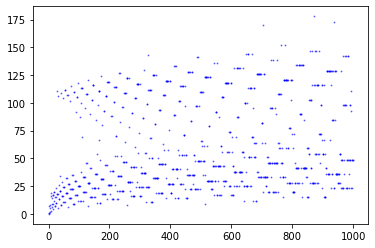

In [10]:
# https://oeis.org/A006577
def a(n):
    if n==1: return 0
    x=0
    while True:
        if n%2==0: n//=2
        else: n = 3*n + 1
        x+=1
        if n<2: break
    return x

print([a(n) for n in range(1, 101)])

x = []
[x.append(a(i)) for i in range(1000)]
plt.scatter(range(len(x)), x, s=0.8, alpha=0.5,marker='o', color='blue')

[3, 2, 3, 0, 1, 0, 3, 2, 3, 0, 0, 0, 1, 8, 3, 0, 0, 0, 9, 2, 1, 16, 1, 6, 3, 2, 1, 0, 0, 0, 3, 4, 5, 2, 0, 18, 1, 2, 3, 0, 7, 2, 17, 28, 3, 0, 0, 0, 1, 10, 9, 0, 0, 2, 1, 12, 3, 4, 1, 10, 1, 6, 3, 14, 15, 12, 7, 4, 11, 0, 5, 4, 13, 20, 3, 2, 1, 8, 11, 2, 1, 2, 0, 2, 29, 18, 3, 40, 0, 10, 3, 16, 19, 24, 3, 0, 5, 44, 1, 164, 1]


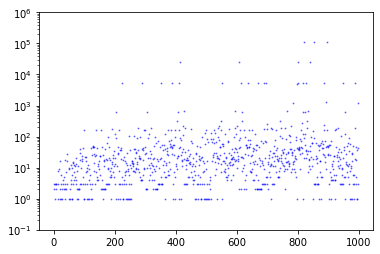

In [11]:
def a(n):
    x=0
    #print(n)
    while n not in (shortcycle + longcycle):
        if n%2==0: n = bitflip(n)
        else: n = 3*n + 1
        x+=1
    return x

print([a(n) for n in range(101)])

x = []
[x.append(a(i)) for i in range(1000)]
plt.scatter(range(len(x)), x, s=0.8, alpha=0.5,marker='o', color='blue')
plt.ylim(0.1, 10e5)
plt.yscale('log')

# Summary
__In summary, we have explored A348074 and we have identified and graphed two cycles that this alrogrithm generates when seeded with integers over a range 0 to N. We have compared the [A348074](https://oeis.org/A348074) with the [Collatz sequence](https://oeis.org/A006370) and it's [trajectories](https://oeis.org/A006577).__